## Introduction
This tutorial will help introduce a couple data science concepts. We will first curate data, then we shall visualize said data and evenutally use it to make predictions. Curation consists of taking out data that we will not be taking advantage of blah blah blah

## Dataset curation
blah blah insert text aout setting shit up

In [54]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# we need to tidy our data frame
Some of that data is represented by integers. For example sex where 0 is Female and 1 is male.
CP which stands for Chest Pain can have four values 
( 0 = asymptomatic, 1 =  atypical angina, 2 = non-anginal pain, 3 = typical angina)
Target represents whether the patient has heart disease with 0 =  Disease and 1 = No Disease
Fasting blood Sugar has two values 1 when it is above 120mg/dl and 0 when it is below 120mg/dl
Restecg

In [51]:
def chest_pain(x):
    if x['Chest Pain'] == 0:
        return 'asymptomatic'
    elif x['Chest Pain'] == 1:
        return 'atypical angina'
    elif x['Chest Pain'] == 2: 
        return 'non-anginal pain'
    elif x['Chest Pain'] == 3:
        return 'typical angina'

In [55]:
df.rename(columns={"cp": "Chest Pain", "target": "Heart Disease"}, inplace = True)
df.head()

,age,sex,Chest Pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
df['sex'] = df['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
df['Chest Pain'] = df.apply(chest_pain, axis = 1)
df['Heart Disease'] = df['Heart Disease'].apply(lambda x: 'No Disease' if x == 1 else 'Diseased')
df['fbs'] = df['fbs'].apply(lambda x: 'Greater' if x == 1 else 'Less')

In [53]:
df.head()

,age,sex,Chest Pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease
0,63,Male,typical angina,145,233,1,0,150,0,2.3,0,0,1,No Disease
1,37,Male,non-anginal pain,130,250,0,1,187,0,3.5,0,0,2,No Disease
2,41,Female,atypical angina,130,204,0,0,172,0,1.4,2,0,2,No Disease
3,56,Male,atypical angina,120,236,0,1,178,0,0.8,2,0,2,No Disease
4,57,Female,asymptomatic,120,354,0,1,163,1,0.6,2,0,2,No Disease


## Data Visualization

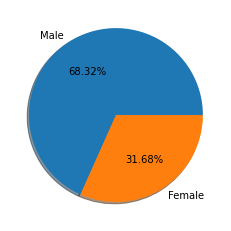

In [10]:
# Comparing males females
female = len(df[df.sex == 0])
male = len(df[df.sex == 1])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'],shadow=True,autopct='%1.2f%%')
plt.show()

From here the data shows most of the people treated were male. Lets see how much of each gender actually have heart disease

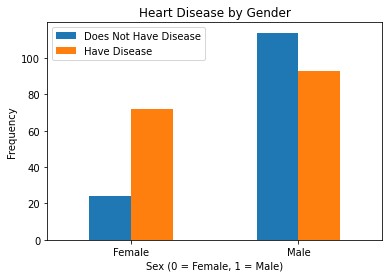

In [75]:
pd.crosstab(df['sex'],df['Heart Disease']).plot(kind="bar") 
plt.title('Heart Disease by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Does Not Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


From here it appears that even though women tend to not be admitted for heart diease as much, more of them tend to have it.

Lets look at Chest Pains.

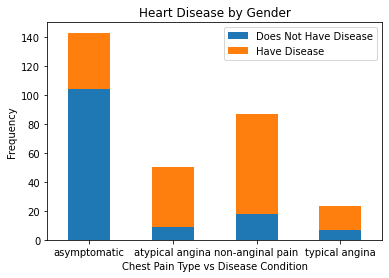

In [74]:
pd.crosstab(df['Chest Pain'],df['Heart Disease']).plot(kind="bar", stacked = True)
plt.title('Heart Disease by Gender')
plt.xlabel('Chest Pain Type vs Disease Condition')
plt.xticks(rotation=0)
plt.legend(["Does Not Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Lets look at the number of heart valves each patient has compared to whether or not they have heart disease.

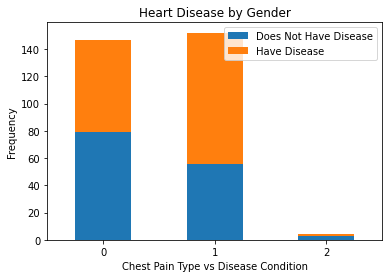

In [73]:
pd.crosstab(df['restecg'],df['Heart Disease']).plot(kind="bar", stacked = True)
plt.title('Heart Disease by Gender')
plt.xlabel('Chest Pain Type vs Disease Condition')
plt.xticks(rotation=0)
plt.legend(["Does Not Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Now lets take a look at those diseased vs not diseased and their fasted blood sugar level at 120mg/dl

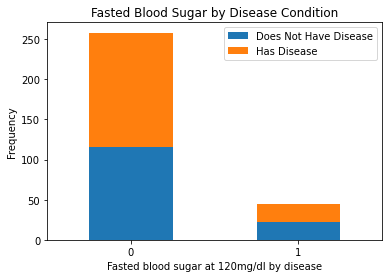

In [72]:
pd.crosstab(df['fbs'],df['Heart Disease']).plot(kind="bar", stacked = True)
plt.title('Fasted Blood Sugar by Disease Condition')
plt.xlabel('Fasted blood sugar at 120mg/dl by disease')
plt.xticks(rotation=0)
plt.legend(["Does Not Have Disease", "Has Disease"])
plt.ylabel('Frequency')
plt.show()